# Business Problem 
<h3> Create a Predictive model which can predict wheather the person is diabetic or not </h3>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import warnings 
warnings.simplefilter('ignore')

In [2]:
# Original Raw Data
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df['Outcome'].unique()

array([1, 0])

In [5]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

<Axes: >

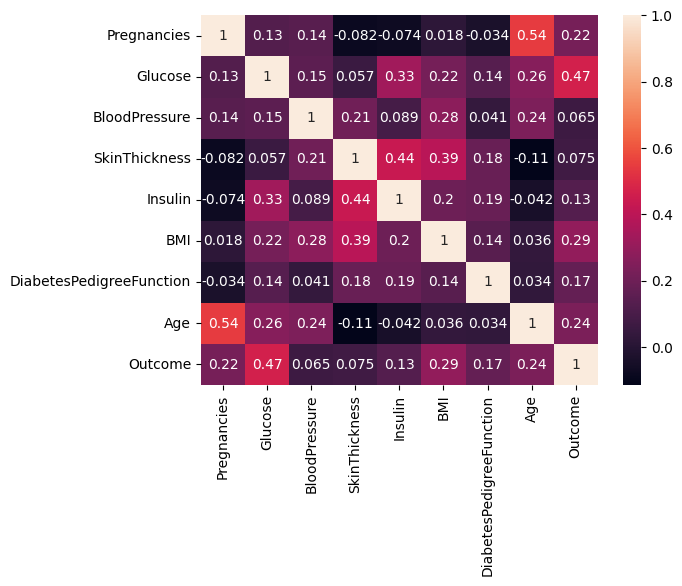

In [7]:
sns.heatmap(df.corr(),annot = True)

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#Train Test Split
X = df.drop('Outcome', axis =1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

#Modeling
log_default = LogisticRegression()
log_default.fit(X_train, y_train)

LogisticRegression()

In [10]:
log_default.coef_

array([[ 8.84497989e-02,  3.31649408e-02, -1.41898633e-02,
         3.72605589e-04, -1.30451424e-03,  8.88616938e-02,
         8.39842151e-01,  1.44172850e-02]])

In [11]:
log_default.intercept_

array([-7.83523635])

In [12]:
log_default.predict_proba(X_test)  

#Here each array object have 2 values. one is propability of occuranance of zero for the point and other is propability of one,
#We can drop one column 

array([[0.46276107, 0.53723893],
       [0.80605215, 0.19394785],
       [0.97001604, 0.02998396],
       [0.92510586, 0.07489414],
       [0.88657183, 0.11342817],
       [0.32688767, 0.67311233],
       [0.78239683, 0.21760317],
       [0.89020253, 0.10979747],
       [0.79430055, 0.20569945],
       [0.88391001, 0.11608999],
       [0.81093524, 0.18906476],
       [0.61982976, 0.38017024],
       [0.27333034, 0.72666966],
       [0.09798211, 0.90201789],
       [0.72916296, 0.27083704],
       [0.6823012 , 0.3176988 ],
       [0.14557469, 0.85442531],
       [0.8232573 , 0.1767427 ],
       [0.89975232, 0.10024768],
       [0.63740811, 0.36259189],
       [0.96063613, 0.03936387],
       [0.58817399, 0.41182601],
       [0.67801417, 0.32198583],
       [0.90487114, 0.09512886],
       [0.8370784 , 0.1629216 ],
       [0.94843639, 0.05156361],
       [0.05130037, 0.94869963],
       [0.91023419, 0.08976581],
       [0.9033226 , 0.0966774 ],
       [0.86808825, 0.13191175],
       [0.

In [13]:
log_default.predict(X_test)
#this dropped the first column and in the second column if value is >0.5 it is class 1 if value is <0.5 it is class 0
#0.5 is the default threshold value i.e the acceptance value.

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [14]:
#Predicting

pred_train = log_default.predict(X_train)
pred_test = log_default.predict(X_test)

train_accuracy  = accuracy_score(y_train, pred_train)
test_accuracy  = accuracy_score(y_test, pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


scores = cross_val_score(log_default,X,y,cv=5,scoring="accuracy")
print(scores)
print('Cross Validation :', scores.mean())


Train Accuracy: 0.7768729641693811
Test Accuracy: 0.8181818181818182
[0.77272727 0.74675325 0.75974026 0.81699346 0.75163399]
Cross Validation : 0.7695696460402341


<h2>With 81% accuracy we can predict the Outcome for the given i/p features.</h2>

In [15]:
outcome_pred = log_default.predict([[6,148,72,35,0,33.6,0.627,50]])
print(outcome_pred) 

outcome_pred = log_default.predict([[1,89,66,23,94,28.1,0.167,21]])
print(outcome_pred) 

[1]
[0]


In [17]:
confusion_matrix(y_test,pred_test)

array([[95,  7],
       [21, 31]])

In [18]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       102
           1       0.82      0.60      0.69        52

    accuracy                           0.82       154
   macro avg       0.82      0.76      0.78       154
weighted avg       0.82      0.82      0.81       154



In [19]:
roc_auc_score(y_test,pred_test)

np.float64(0.7637631975867271)

In [20]:
roc_auc_score(pred_test,y_test)

np.float64(0.817377495462795)